Перед нами датасет с 13 показателями здоровья, которые помогут определить, есть ли болезнь сердца у человека, а так же целевая переменная, которая показывает наличие или отсутствие заболевания.



*	age - возраст;
*	sex - пол ;
*	cp - тип боли в груди (типы: 0,1,2,3);
*	trestbps - артериальное давление в покое;
*	chol – показатели холестерина;
*	fbs - уровень сахара (0 - если сахар в норме, 1 - если выше нормы);
*	restecg - результаты экг в покое (значения 0,1,2);
*	thalach – максимальная частота сердечных сокращений(пульса);
*	exang - стенокардия, вызванная физической нагрузкой (0 - если нет стенокардии, 1 - если есть);
*	oldpeak - Депрессия ST;
*	slope - наклон сегмента ST при пиковой нагрузке(значения 0,1,2);
*	ca - количество крупных сосудов (значения 0,1,2,3);
*	thal - талассемия (значения 0,1,2,3);
*   target – наличие, отсутствие серечного заболевания (0 - если нет заболевания, 1 - если есть).


Сначала составим описательную статистику, удалим выбросы, посмотрим на корреляцию параметров и затем попробуем предсказать линейный параметр с помощью линейной регрессии и бинарный параметр с помощью логистической регрессии.

In [150]:
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as sts
import seaborn as sns
%matplotlib inline

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import pandas as pd


In [109]:
heart = pd.read_csv('heart.csv')
heart

,number,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,300,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,301,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,302,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [110]:
#удалим колонку, которая не дает никакой нужной информации
heart.drop(['number'], inplace=True, axis=1)

Сначала посмотрим на тип данных и на описательную статистику, и узнаем есть ли пропущенные значения в данных

In [111]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [112]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [113]:
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Итак, в данных преобладает целый тип, отсутствуют пропущенные значения. Получено первичное представление о статистических характеристиках, например, в датасете преобладают люди зрелого возраста, у показателя холестерин больше всех разбросаны значения, в выходном параметре target несколько больше людей, у которых обнаружена болезнь, чем здоровых.

Следующим шагом будет выяление нетипичных данных.

<ipython-input-114-25fb36e7b3b5>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  heart.hist(ax=ax)


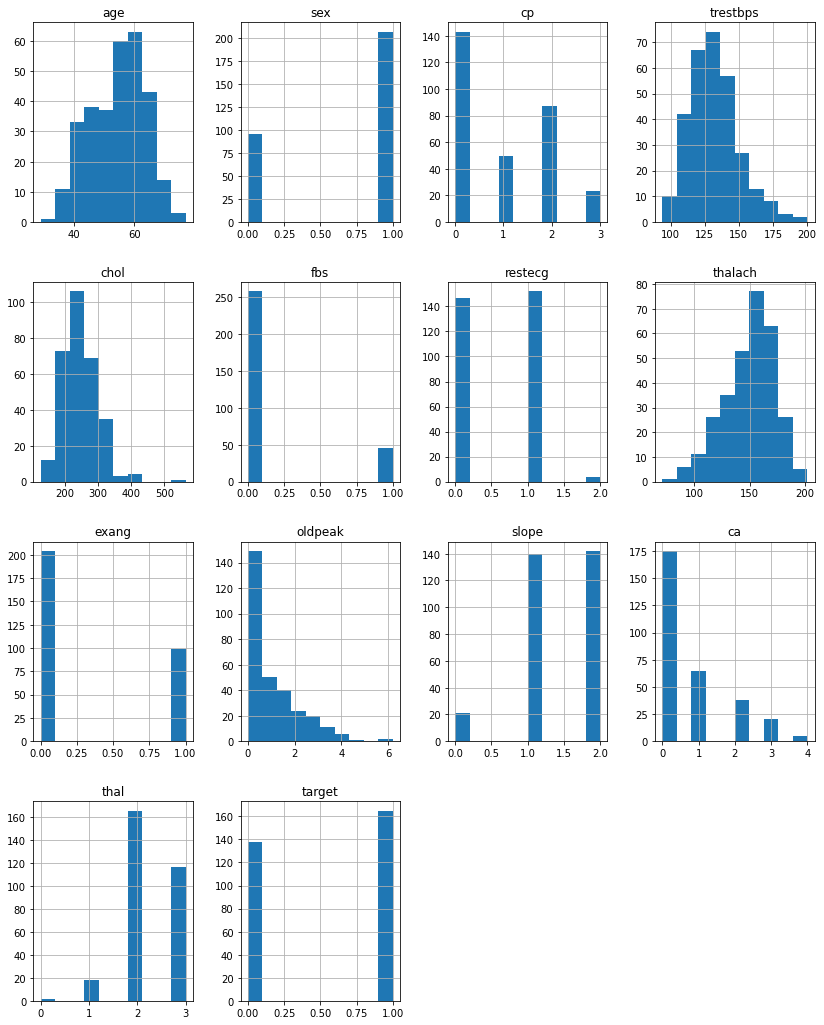

In [114]:
# проверка распределений с помощью гистограмм
fig = plt.figure(figsize = (14,18))
ax = fig.gca()
heart.hist(ax=ax)
plt.show()

Проанализировав гистаграммы показателей, наличие выбросов можно предположить у таких показателей как:
- thalach 
- trestbps
- chol
- oldpeak

Чтобы изучить особенность поближе, построим коробчатую диаграмму для кадого показателя.

<AxesSubplot:>

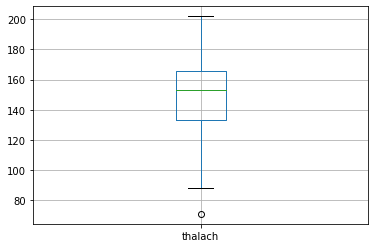

In [115]:
heart.boxplot(column=['thalach'])

Видим, что есть выброс со значением меньше 80

In [116]:
heart['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

Для признака thalach видно, что минимальное значение равно 71, в то время как 75-й процентиль равен 166. Значение 71 – выброс, его мы удалим.

In [117]:
heart = heart.drop(heart[heart['thalach'] == 71].index)

<AxesSubplot:>

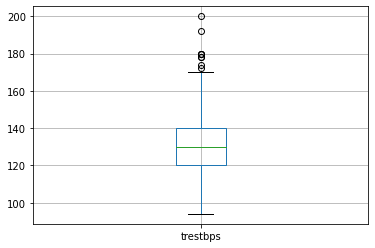

In [118]:
heart.boxplot(column=['trestbps'])

In [119]:
heart['trestbps'].describe()

count    302.000000
mean     131.662252
std       17.554429
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

Для признака trestbps видно, что cуществуют аномально высокие показатели больше 180, в то время как 75-й процентиль равен 140. Значения выше 180 – выбросы, их мы удалим.

In [120]:
heart = heart.drop(heart[heart['trestbps'] > 180].index)

<AxesSubplot:>

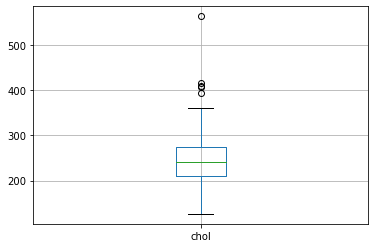

In [121]:
heart.boxplot(column=['chol'])

In [122]:
heart['chol'].describe()

count    300.000000
mean     246.033333
std       51.987510
min      126.000000
25%      211.000000
50%      240.000000
75%      274.000000
max      564.000000
Name: chol, dtype: float64

Для признака chol видно, что cуществуют аномально высокие показатели больше 390, в то время как 75-й процентиль равен 274. Значения выше 380 – выбросы, их мы удалим.

In [123]:
heart = heart.drop(heart[heart['chol'] > 380].index)

<AxesSubplot:>

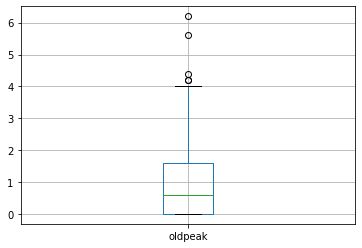

In [124]:
heart.boxplot(column=['oldpeak'])

In [125]:
heart['oldpeak'].describe()

count    295.000000
mean       1.018644
std        1.147679
min        0.000000
25%        0.000000
50%        0.600000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

Для признака oldpeak видно, что cуществуют аномально высокие показатели больше 5, в то время как 75-й процентиль равен 1,6. Значения выше 5 – выбросы, их мы удалим.

In [126]:
heart = heart.drop(heart[heart['oldpeak'] > 5].index)

Следующим шагом является выявление линейно зависимых данных. Для этого построим матрицу корреляции

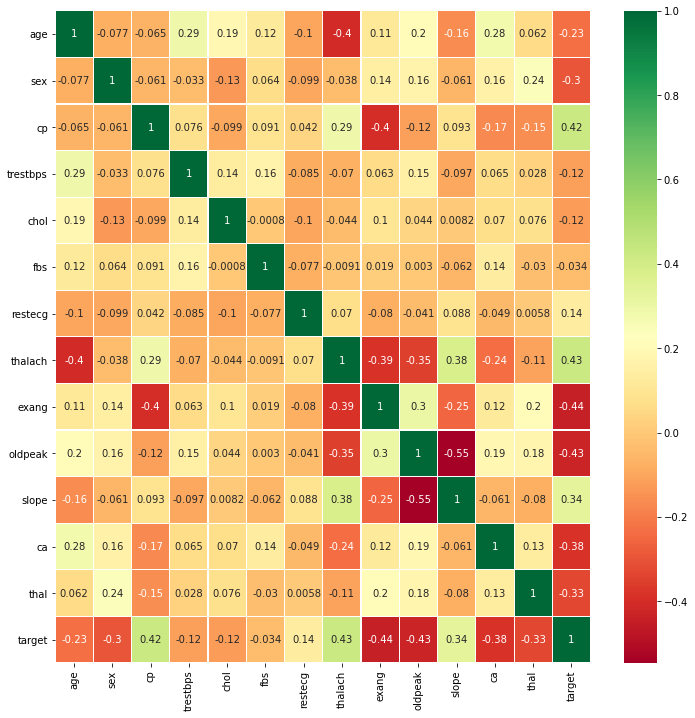

In [127]:
sns.heatmap(heart.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Проанализировав матрицу можно сделать вывод о том, что между показателями отсутствует мультиколлинеарность, а наиболее коррелированными показателями с целевой переменной target являются: cp, thalach, exang, oldpeak, slope, ca, thal.  
Эти показатели обязательно должны быть включены в выборку для системы классификации.

Для начала рассмотрим линейную регрессию на примере двух линейных показателей - age (возраст) и thalach (максимальная частота пульса), которые имею большую линейную зависимость.

In [128]:
#обучаем модель
age = heart['age']
thalach = heart['thalach']
model = LinearRegression()
result = model.fit(np.array(thalach).reshape(-1,1), age)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 78.65764937479724
slope: [-0.16353203]


На основе подобранных коэффициентов intercept (коэффициент b в уравнении прямой y=kx+b) и slope (коэффициент k в уравнении прямой) построим прямую, которая наилучшим образом описывает линейную зависимость наших параметров.

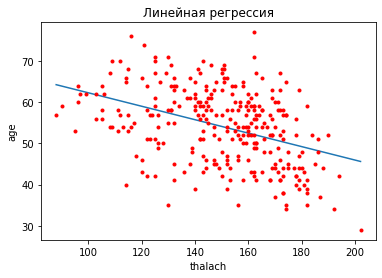

In [129]:
plt.xlabel('thalach')
plt.ylabel('age')
plt.title('Линейная регрессия')
x = np.linspace(min(thalach), max(thalach), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(thalach, age, 'r.')
plt.show()

Итак появилась модель, которая будет по максимальной частоте пульса предсказывать возраст пациента.

Попробуем спрогнозировать возраст пациента на основе обученной модели, задав конкретное значения параметра thalach.

In [130]:
print ('Возраст пациента :', model.predict(np.array([160]).reshape(-1, 1)))

Возраст пациента : [52.4925252]


По заданной максимальной частоте пульса равной 160, модель предсказала нам, что пациенту 52 года, посмотрим, сколько лет людям в выборке с таким значением пульса

In [131]:
heart[heart['thalach'] == 160]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2,1
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2,1
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2,0
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2,0


Видим, что возраст людей, которые имеют максимальную частоту пульса 160 сильно разбросан (46-62 года).

Оценим точность нашей модели

In [132]:
model.score(np.array(thalach).reshape(-1,1), age)

0.16327326250368068

Точность является очень низкой, возможно из-за того, что мы предсказывали возраст с помощью одного параметра. Модель, у которой число независимых переменных две или более, называется множественной линейной регрессией. Именно с помощью нее попробуем предсказать более точно возраст пациента.

## Множественная линейная регрессия

Необходимо выбрать такую модель, в которой определенный набор независимых переменных сможет наилучшим образом предсказать целевой параметр. Для сравнения моделей с разным числом параметров, когда требуется выбрать лучший набор независимых переменных, используется информационный критерий Акаике (AIC). 

Чем меньше значение критерия, тем лучше модель. Сначала вычислим значение критерия для показателя thalach, который имеет наибольшую корреляцию с целевой переменной. Затем в модель поочередно будем добавлять параметры, которые убывают по величине корреляции в сравнении с thalach, и смотреть, что покажет критерий. Далее выберем модель, для которой значение критерия окажется минимальным.

In [133]:
X =  heart['thalach']
y = heart['age']
X = sm.add_constant (X)
model = sm.OLS(y, X).fit()
print(model.aic)

2077.3663227503885


In [134]:
X =  heart[['thalach','trestbps', 'chol', 'oldpeak','slope', 'ca']]
y = heart['age']
X = sm.add_constant (X)
model = sm.OLS(y, X).fit()
print(model.aic)

2043.0677530276437


Для модели был выбран следующий набор независимых переменных: [ 'thalach', 'trestbps', 'chol', 'oldpeak','slope', 'ca' ]. Далее разделим модель на тренировочную и тестовую выборки. Соответственно, на тренировочную выборке обучим нашу модель, а на тестовой будем предсказывать данные.

In [135]:
# делим на тренировочную и тестовую выборки: 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 15)

In [136]:
#обучаем модель
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Предскажем возраст для первых 5 людей из тестовой выборки.

In [137]:
y_pred = model.predict(X_test)
y_pred[0:5]

array([54.39842285, 55.31322989, 45.9652617 , 50.6353279 , 59.00905669])

Посмотрим, какой возраст был на самом деле в тестовой выборке

In [138]:
np.array(y_test)[0:5]

array([42, 67, 46, 51, 58], dtype=int64)

Можно увидеть, что для первых двух пациентов предсказанный и истинный возраст сильно отличается. А для следующих трех пациентов разница составляет всего 1 год. Определим точность с помощью средней квадратической ошибки.

In [139]:
print(mean_squared_error(y_pred, np.array(y_test))**0.5)

8.749581683135492


Средняя квадратическая ошибка показывает, что в среднем наша модель определяет неверно возраст пациента почти на 9 лет. Посмотрим, как оценит точность нашей модели метод score().

In [140]:
model.score(X, y)

0.27686868543321175

Метод score() показал, что наша модель плохо определяет целевую переменную. Но если сранивать с одномерной линейной регрессией, где точность по методу score() была 0.16, множественная линейная регрессия дает более точный результат. Но использовать на приктике данную модель я не рекомендую, так как точность 0.27 является очень низкой. Скорее всего из-за того, что входные параметры имели слабую корреляцию с целевой переменной, где максимальная из них была всего 0.4 (параметр thalach), не удалось постороить более точную предсказательную модель.

## Логистическая регрессия

Рассмотрим логистическую регрессию, которая использует логистическую функцию для моделирования зависимости целевой переменной от набора входных данных, когда в случае, когда целевая переменная является бинарной.

В нашей выборке такой переменной является target, которая показывает наличие или отсутствие серечного заболевания.

Разделим выборку на целевой параметр и на входные параметры, которые на нее влияют, а затем разделим модель на тренировочную и тестовую выборки.

In [143]:
# определяем х и у
y = heart['target']
X = heart.drop(['target'], axis = 1)

# деление на обучающую и тестовую выборки: 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [144]:
#обучаем модель
heart_reg = LogisticRegression(
    # для небольших датасетов лучше подходит метод для поиска решения liblinear
    solver = 'liblinear').fit(X_train, y_train)
heart_reg_pred = heart_reg.predict(X_test)

Предскажем диагноз для первых 5 людей из тестовой выборки.

In [145]:
heart_reg_pred[0:5] 

array([0, 1, 0, 1, 1], dtype=int64)

Посмотрим, какой диагноз был на самом деле в тестовой выборке.

In [146]:
y_test[0:5]

244    0
160    1
219    0
2      1
54     1
Name: target, dtype: int64

Модель верно угадала диагноз для первых 5 людей из тестовой выборки. Посмотрим на точность нашей модели

In [147]:
heart_reg.score(X_test, y_test)

0.8305084745762712

Метод оценки точности score() показал, что наша модель хорошо определяет классы. 

Составим матрицу неточностей, которая покажет насколько точно модель определяет классы путем сравнения прогнозируемого значения целевой переменной с ее фактическим значением.

Text(0.5, 1.0, 'Матрица неточностей')

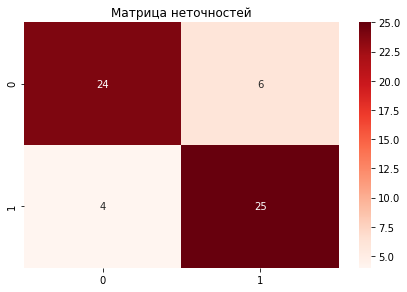

In [153]:
cnf_matrix_log = confusion_matrix(y_test, heart_reg_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Матрица неточностей')

Матрица неточности показала, что к числу здоровых пациентов правильно было определено 24 пациента, ко числу больных пациентов - 25. Ложно к здоровым пациентам определено - 6, к больным - 4 пациента.

Можно сделать вывод, что модель хорошо предсказывает болезнь сердца по входным показателям.